<a href="https://colab.research.google.com/github/gabrwell/analise_de_dados/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)

# **01 - Carregue o dataset e exibe as 10 primeiras linhas**

In [11]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **02 diferença entre Global_active_power e Global_reactive_power**

Global_active_power: Esta coluna representa a potência ativa total consumida pela residência em quilowatts (kW). A potência ativa é a potência real que realiza trabalho útil, como acender lâmpadas, fazer funcionar motores, etc. É a energia que você realmente "usa" e pela qual paga na sua conta de eletricidade.

Global_reactive_power: Esta coluna representa a potência reativa total consumida pela residência em quilovolt-ampère reativo (kVAr). A potência reativa é a potência que não realiza trabalho útil diretamente, mas é necessária para criar campos magnéticos em equipamentos como motores, transformadores e reatores. Ela não é convertida em trabalho, mas é necessária para que a potência ativa possa ser entregue.

## **03 Verifique se tem valores ausentes e quantifique-os**

In [12]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


# **04 Converta a coluna Date para o tipo datetime e cria uma nova coluna com o dia da semana correspondente**

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


# **05 Filtre os registros apenas do ano 2007 e calcule a média de consumo diário de Gblobal_active_power**

In [14]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]

daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


# **06. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**



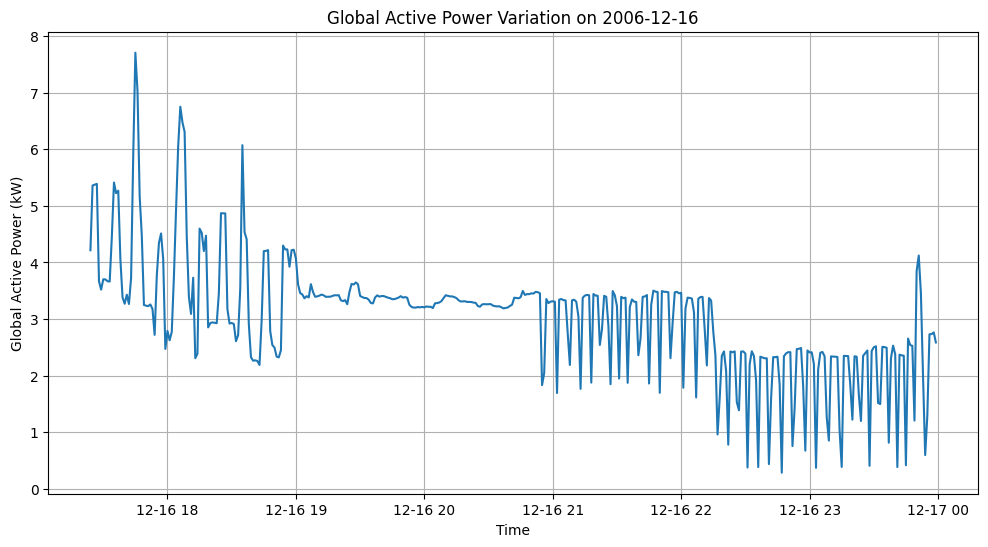

In [15]:
import matplotlib.pyplot as plt

# Choose a specific day (e.g., the first day in the dataset)
date_to_plot = df['Date'].iloc[0]
df_single_day = df[df['Date'] == date_to_plot].copy()

# Combine 'Date' and 'Time' columns for plotting
df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title(f'Global Active Power Variation on {date_to_plot.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

# **07. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

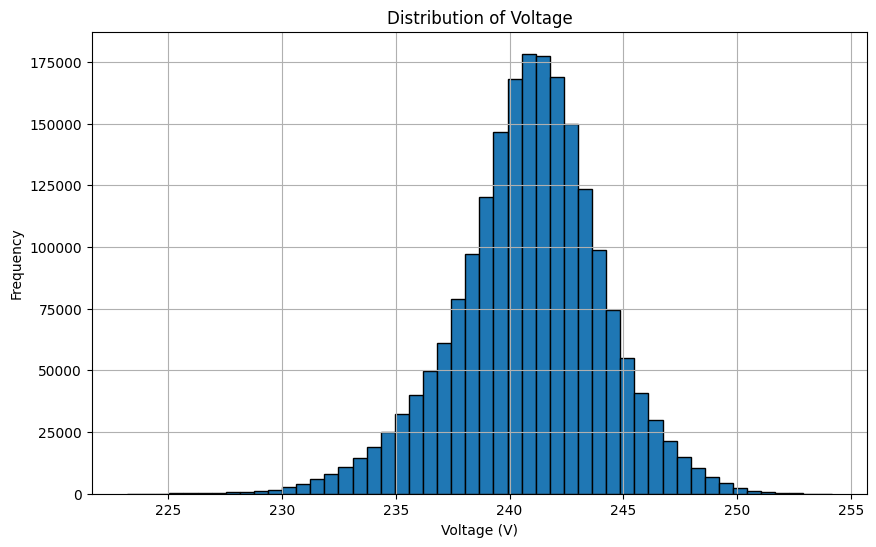

In [16]:
import matplotlib.pyplot as plt

# Ensure 'Voltage' column is numeric
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Drop rows with NaN values in 'Voltage' if any resulted from coercion
df.dropna(subset=['Voltage'], inplace=True)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.grid(True)
plt.show()

# **08. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [17]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_power = df.groupby('Month')['Global_active_power'].mean()
display(monthly_avg_power)

,Global_active_power
Month,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


# **09. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [18]:
daily_power_sum = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_power_sum.idxmax()
highest_consumption_value = daily_power_sum.max()

print(f"O dia com maior consumo de energia ativa global é: {day_with_highest_consumption.strftime('%Y-%m-%d')}")
print(f"Valor do maior consumo: {highest_consumption_value:.2f} kW")

O dia com maior consumo de energia ativa global é: 2006-12-23
Valor do maior consumo: 4773.39 kW


# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [19]:
# Create a new column to identify weekdays and weekends
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Final de semana' if x in ['Saturday', 'Sunday'] else 'Dia de semana')

# Calculate the average Global_active_power for each day type
average_power_by_daytype = df.groupby('DayType')['Global_active_power'].mean()

display(average_power_by_daytype)

,Global_active_power
DayType,
Dia de semana,1.035472
Final de semana,1.234232


# **15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).**

In [20]:
# Define summer and winter months (Northern Hemisphere)
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2]  # December, January, February

# Filter data for summer and winter months
df_summer = df[df['Date'].dt.month.isin(summer_months)].copy()
df_winter = df[df['Date'].dt.month.isin(winter_months)].copy()

# Calculate the average Global_active_power for summer and winter
average_power_summer = df_summer['Global_active_power'].mean()
average_power_winter = df_winter['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão: {average_power_summer:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno: {average_power_winter:.2f} kW")

Consumo médio de energia ativa global no verão: 0.73 kW
Consumo médio de energia ativa global no inverno: 1.42 kW


## ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***.



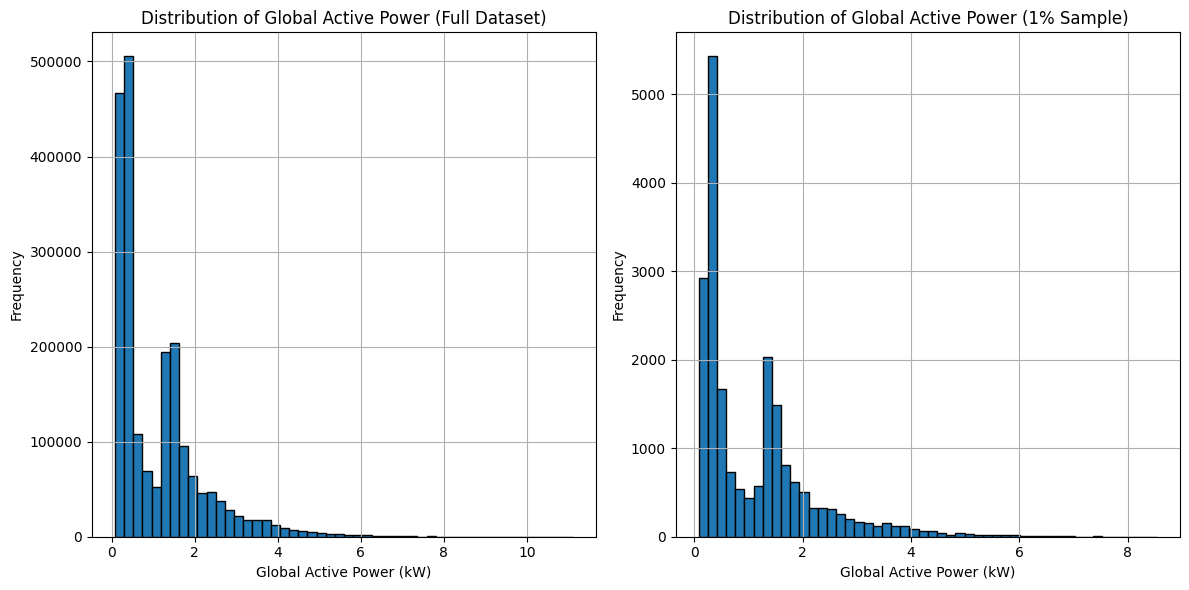

In [21]:
import matplotlib.pyplot as plt

# Take a 1% random sample of the data
df_sample = df.sample(frac=0.01, random_state=42) # Using random_state for reproducibility

# Create histograms for both the full dataset and the sample
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(df['Global_active_power'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (Full Dataset)')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (1% Sample)')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# **17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify the main numerical columns to normalize
# Exclude 'Date', 'Time', 'DayOfWeek', 'DayType', and 'Month'
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the normalized data
display(df.head())

# **18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.**

In [22]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering: aggregate daily consumption
# We can sum or average consumption for each day. Let's use sum for total daily consumption.
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()

# We only need the consumption data for clustering
X = daily_consumption[['Global_active_power']].values

# Apply K-means clustering
# We'll use 3 clusters as requested
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init='auto' or a number is recommended
daily_consumption['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with the assigned cluster
display(daily_consumption.head())

,Date,Global_active_power,Cluster
0,2006-12-16,1209.176,0
1,2006-12-17,3390.460,1
2,2006-12-18,2203.826,1
3,2006-12-19,1666.194,2
4,2006-12-20,2225.748,1


# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power* em um período de 6 meses.***

# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***